In [1]:
import sys
import os
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import holidays
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

### Caminho do dataset

In [2]:
cliente    = 'df_qtde_ref.csv'
path_miner = '../../../data/miner/'
path_res   = '../../../data/result/'

data = cliente

#### Importando o dataset

In [3]:
df   = pd.read_csv(path_miner + data, encoding="utf-8")

### Pré processando o dataset

In [4]:
# Deletando coluda do id
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df.dtypes

valor_unit    float64
mes             int64
dia_semana      int64
dia             int64
fim_semana      int64
inicio_mes      int64
feriado         int64
quantidade    float64
dtype: object

In [6]:
df.head(20)

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade
0,2.49,1,2,2,0,1,0,240.0
1,2.35,1,3,3,0,1,0,331.0
2,2.29,1,4,4,0,1,0,310.0
3,2.29,1,5,5,1,1,0,228.0
4,2.29,1,6,6,1,1,0,127.0
5,2.29,1,0,7,0,1,0,180.0
6,2.29,1,1,8,0,1,0,207.0
7,2.25,1,2,9,0,1,0,396.0
8,2.26,1,3,10,0,0,0,317.0
9,2.26,1,4,11,0,0,0,452.0


In [7]:
df.tail(20)

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade
387,2.69,2,3,13,0,0,0,53.0
388,2.69,2,4,14,0,0,0,26.0
389,2.69,2,5,15,1,0,0,42.0
390,2.69,2,6,16,1,0,0,30.0
391,2.49,2,0,17,0,0,0,67.0
392,2.49,2,1,18,0,0,0,106.0
393,2.49,2,2,19,0,0,0,67.0
394,2.49,2,3,20,0,0,0,85.0
395,2.69,2,4,21,0,0,0,73.0
396,2.69,2,5,22,1,0,0,48.0


## KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
X = df[['valor_unit', 'mes', 'dia_semana', 'dia', 'fim_semana', 'inicio_mes',
       'feriado']]
y = df['quantidade']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((325, 7), (82, 7), (325,), (82,))

In [12]:
neighbors = np.arange(1, 200)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred_kn = kn.predict(X_test)
    rmse[i] = np.sqrt(metrics.mean_squared_error(y_test, y_pred_kn))

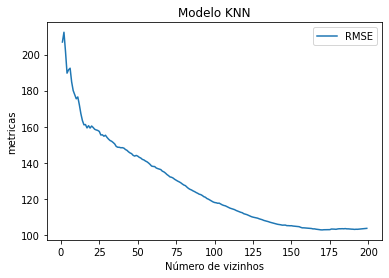

In [13]:
plt.title('Modelo KNN')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

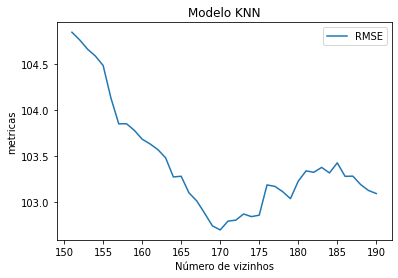

In [14]:
plt.title('Modelo KNN')
plt.plot(neighbors[150:190], rmse[150:190], label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

In [15]:
kn = KNeighborsRegressor(n_neighbors=170)
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_kn))

print('RMSE:', rmse)

RMSE: 102.69414783017228


### Resultados

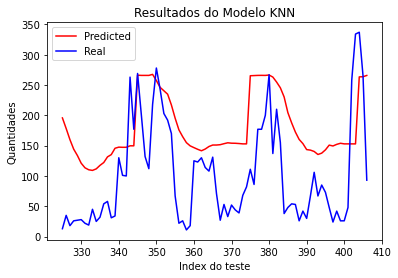

In [16]:
plt.figure()
plt.title('Resultados do Modelo KNN')
plt.plot(y_test.index, y_pred_kn, label = 'Predicted', color='red')
plt.plot(y_test.index, y_test, label = 'Real', color='blue')
plt.legend()
plt.xlabel('Index do teste')
plt.ylabel('Quantidades')
plt.show()

## AdaBoostRegressor

In [17]:
from sklearn.ensemble import AdaBoostRegressor

In [18]:
abr = AdaBoostRegressor(n_estimators=300)

In [19]:
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=300, random_state=None)

In [20]:
y_pred_abr = abr.predict(X_test)

In [21]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_abr))

print('RMSE:', rmse)

RMSE: 150.48617446729375


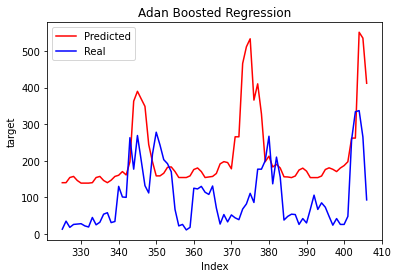

In [22]:
plt.figure()
plt.title("Adan Boosted Regression")
plt.plot(X_test.index, y_pred_abr, label="Predicted", color='red')
plt.plot(X_test.index, y_test, label="Real", color='blue')
plt.xlabel("Index")
plt.ylabel("target")
plt.legend()
plt.show()

## AdaBoostRegressor with DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
abradtr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=100),
                          n_estimators=300)

In [25]:
abradtr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=100,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                

In [26]:
y_pred_abradtr = abr.predict(X_test)

In [27]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_abradtr))

print('RMSE:', rmse)

RMSE: 150.48617446729375


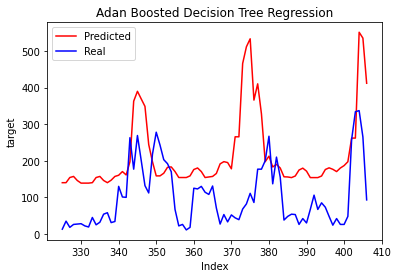

In [28]:
plt.figure()
plt.title("Adan Boosted Decision Tree Regression")
plt.plot(X_test.index, y_pred_abradtr, label="Predicted", color='red')
plt.plot(X_test.index, y_test, label="Real", color='blue')
plt.xlabel("Index")
plt.ylabel("target")
plt.legend()
plt.show()